책230p 문제해결 방법은 여러가지

iris 품종 분류 2개
특성도 꽃잎의 길이 너비 2개



In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 그래프
from sklearn.model_selection import train_test_split # 분리

In [76]:
irisDF = pd.read_csv("../data/iris.csv", usecols=[2, 3, 4])
irisDF # 꽃잎의 길이, 꽃잎의 너비, 종

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa
...,...,...,...
145,5.2,2.3,Virginica
146,5.0,1.9,Virginica
147,5.2,2.0,Virginica
148,5.4,2.3,Virginica


In [77]:
# 'Setosa', 'Versicolor', 'Virginica'
irisDF = irisDF[irisDF["variety"].isin(['Setosa', 'Versicolor'])]

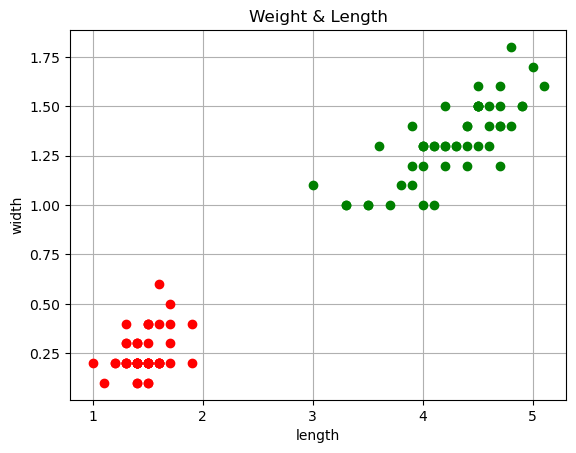

In [103]:
color = ["r", "g", "b"]
idx = 0
for variety in irisDF["variety"].unique():
    tempDF = irisDF[irisDF["variety"] == variety]
    plt.plot(tempDF["petal.length"], tempDF["petal.width"], f"{color[idx]}o")
    plt.xlabel("length")
    plt.ylabel("width")
    plt.title("Weight & Length")
    idx += 1
plt.grid()
plt.show()

In [79]:
'''
from sklearn.preprocessing import OrdinalEncoder # 카테고리를 텍스트에서 숫자로 

ordinal_encoder = OrdinalEncoder()
irisDF["variety"] = ordinal_encoder.fit_transform(irisDF["variety"].values.reshape(-1, 1)) # 카테고리 부분만!
irisDF.head(10)
'''

'\nfrom sklearn.preprocessing import OrdinalEncoder # 카테고리를 텍스트에서 숫자로 \n\nordinal_encoder = OrdinalEncoder()\nirisDF["variety"] = ordinal_encoder.fit_transform(irisDF["variety"].values.reshape(-1, 1)) # 카테고리 부분만!\nirisDF.head(10)\n'

In [80]:
# ordinal_encoder.categories_ # 카테고리 확인 

In [113]:
featureDF = irisDF.iloc[:,[0, 1]] # feature는 2개

targetSR = irisDF.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, stratify=targetSR, random_state=42)

In [82]:
y_train.shape, X_train.shape

((70,), (70, 2))

In [83]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Scaler.fit(X_train)

scaled_X_train = Scaler.transform(X_train)
scaled_X_test = Scaler.transform(X_test)

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate # 교차 검증 

In [85]:
SVC_model = SVC(kernel="linear", C=1.0, probability=True) # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# VC_model2 = SVC(kernel="rbf") # default

In [86]:
SVC_model.fit(scaled_X_train, y_train)

SVC(kernel='linear', probability=True)

In [87]:
print(SVC_model.score(scaled_X_train, y_train))
print(SVC_model.score(scaled_X_test, y_test))

1.0
1.0


In [88]:
pred_y = SVC_model.predict(scaled_X_test)
pred_y

array(['Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Versicolor', 'Setosa'], dtype=object)

## 새로운 데이터 생성 및 predict

In [89]:
new_data = pd.DataFrame([[1.1, 0.1]])
new_data

,0,1
0,1.1,0.1


In [90]:
new_data = Scaler.transform(new_data) # 새로운 데이터도 스케일링 해줘야함 

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [91]:
SVC_model.predict(new_data)

array(['Setosa'], dtype=object)

In [100]:
SVC_model.coef_

array([[0.70749597, 1.15025329]])

In [101]:
SVC_model.coef_[0][0]*new_data[0][0] + SVC_model.coef_[0][1]*new_data[0][1] + SVC_model.intercept_

array([-2.02111783])

In [102]:
SVC_model.support_vectors_ # 모든 클래스별 서포트 벡터

array([[-0.67817351, -0.67451438],
       [ 0.09774566,  0.58698198]])

In [95]:
sv = SVC_model.support_vectors_.T
sv[0] # 길이
sv[1] # 너비

array([-0.67451438,  0.58698198])

In [98]:
colors = ["orange" if idx >= 50 else "blue" for idx in range(scaled_X_train.shape[0])]
plt.scatter(x_data[0], t_data[1])
plt.plot(sv[0], sv[1], "ro")

# 경계선 그려보기 
plt.show()

NameError: name 'x_data' is not defined

In [104]:
SVC_model.n_support_ # 클래스별 support vector

array([1, 1])

In [ ]:
WT1*x_1 + WT2*x2 +b = 0

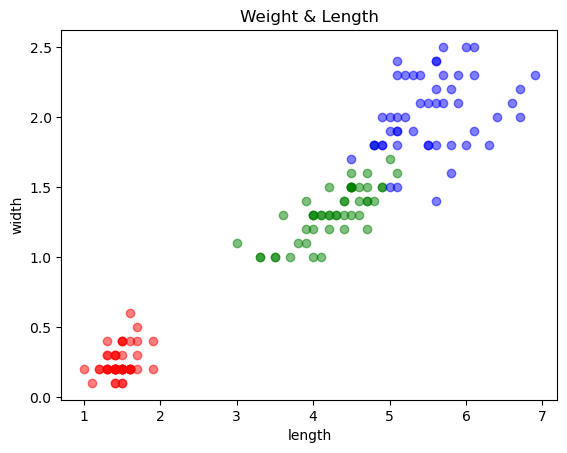

In [130]:
color = ["r", "g", "b"]
idx = 0
for variety in irisDF["variety"].unique():
    tempDF = irisDF[irisDF["variety"] == variety]
    plt.plot(tempDF["petal.length"], tempDF["petal.width"], f"{color[idx]}o", alpha = 0.5)
    plt.xlabel("length")
    plt.ylabel("width")
    plt.title("Weight & Length")
    idx += 1
plt.show()

In [126]:
'''
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = SVC(kernel = 'linear',random_state=42)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)
'''

,C,mean_test_score
3,1.000,0.980952
4,10.000,0.971429
5,25.000,0.971429
7,100.000,0.961905
2,0.100,0.952381
6,50.000,0.952381
0,0.001,0.914286
1,0.010,0.914286


In [122]:
X.shape, type(X)

((150, 2), numpy.ndarray)

In [124]:
y.shape, type(y)

((150,), numpy.ndarray)

In [130]:
np.array(featureDF).shape

(100, 2)

In [148]:
np.array(featureDF)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [153]:
svc_model.coef_

array([[1.1, 0.7]])

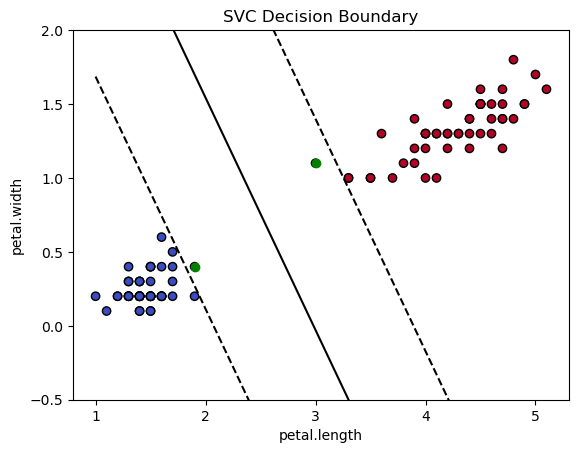

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.array(featureDF)
y = targetSR.T.replace({"Setosa":0, "Versicolor":1}) # 이진화 데이터 

# SVC 모델 생성
svc_model = SVC(kernel='linear')
svc_model.fit(X, y)

# 결정 경계 그리기
w = svc_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max()) # 그래프용, 수식 대압용
yy = a * xx - (svc_model.intercept_[0]) / w[1]

# Support vectors
margin = 1 / np.sqrt(np.sum(svc_model.coef_ ** 2)) #분산 
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--') # 점선
plt.plot(xx, yy_up, 'k--') # 점선 

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.scatter(svc_model.support_vectors_[:, 0],svc_model.support_vectors_[:, 1],color="green")

plt.ylim(-0.5,2)
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.title('SVC Decision Boundary')
plt.show()

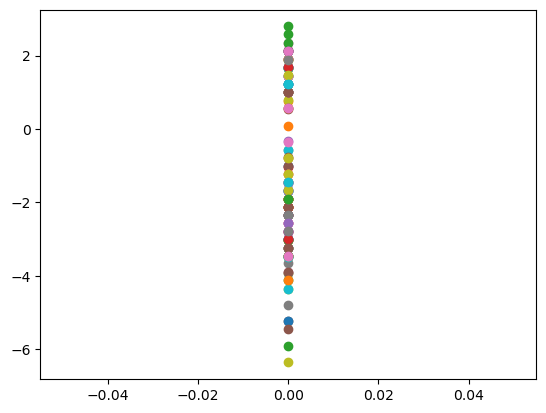

In [161]:
for feature_vals in X:
    decision_boundary = sum(m * feature_val for m, feature_val in zip(svc_model.coef_[0], feature_vals)) + svc_model.intercept_[0]
    plt.plot(decision_boundary, "o")
plt.show()

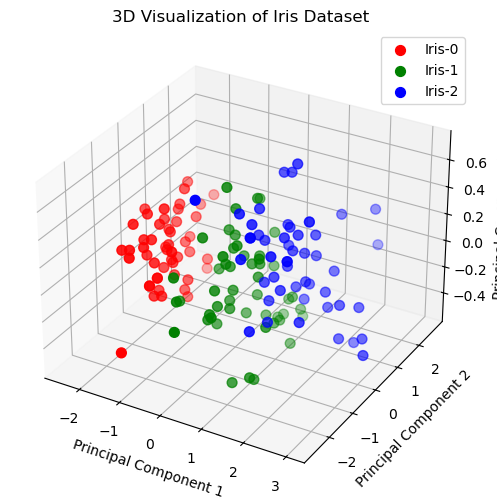

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data[:, :3]  # 3개의 피쳐만 선택
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# PCA를 사용하여 3차원으로 차원 축소
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_standardized)

# 3차원 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for target, color in zip(range(3), colors):
    indices = y == target
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2], c=color, s=50, label=f'Iris-{target}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Iris Dataset')
ax.legend()
plt.show()